In [27]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt

In [7]:
file_name = '/home/void/git/KML_hidreletricas/relatorios/relatorio_710.csv'
df = pd.read_csv(filepath_or_buffer=file_name, sep=';', encoding= 'unicode_escape')

In [8]:
fo = df['Classificação'] == 'Outorga'
fr = df['Classificação'] == 'Reserva de disponibilidade hídrica'
fs = df['Status'] == 'Concedida'

In [11]:
df_portaria = df[fo | fr]
df_concedida = df_portaria[fs]

/home/void/anaconda3/envs/drh/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [25]:
entrada = df_concedida['Data de início do cadastro']
entrada = [date(int(i.split('/')[2]), int(i.split('/')[1]), int(i.split('/')[0])) for i in entrada]
entrada = np.array(entrada)
saida = df_concedida['Data de saída do processo']
saida = [date(int(i.split('/')[2]), int(i.split('/')[1]), int(i.split('/')[0])) for i in saida]
saida = np.array(saida)
tspan = saida - entrada
tspan = [tspan[i].days for i in range(len(tspan))]

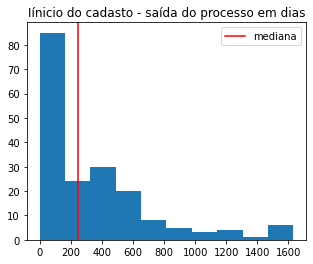

In [39]:
plt.figure(figsize=(5,4))
plt.hist(tspan)
plt.axvline(np.median(tspan), c='red', label='mediana')
plt.title('Iínicio do cadasto - saída do processo em dias')
plt.legend()